<a href="https://colab.research.google.com/github/preetikhullbe/mobile-price-prediction/blob/main/Mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Mobile price Prediction**

# **The Problem**
The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.


# **Introduction**
Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

# **Data description**

**battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import datetime
import datetime as dt

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mobile_price_df=pd.read_csv("//content/drive/MyDrive/data_mobile_price_range.csv",encoding="unicode_escape")
mobile_price_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile_price_df.shape

(2000, 21)

In [ ]:
mobile_price_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
mobile_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mobile_price_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
mobile_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
# Checking Duplicate Values
value=len(mobile_price_df[mobile_price_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


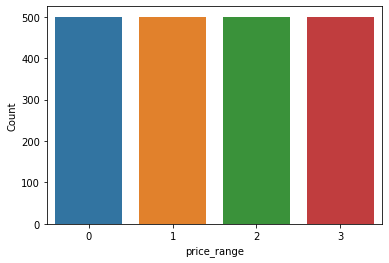

In [ ]:
sns.countplot(mobile_price_df['price_range'])
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

# Data Distribution

Let us analyse some data features and see their distribution

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


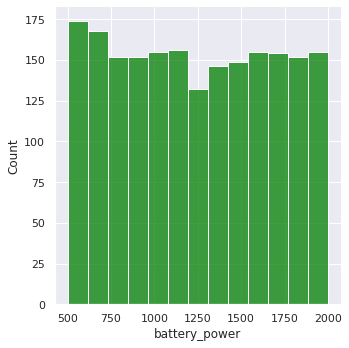

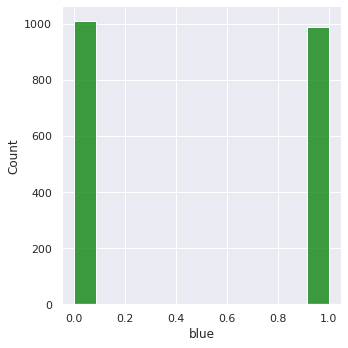

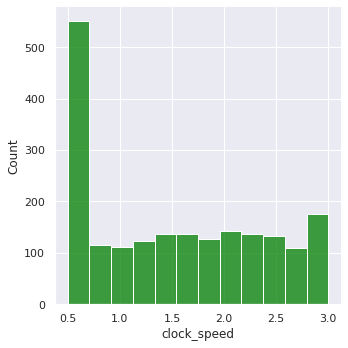

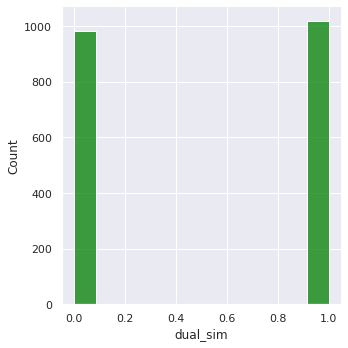

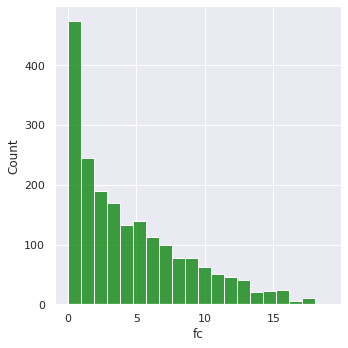

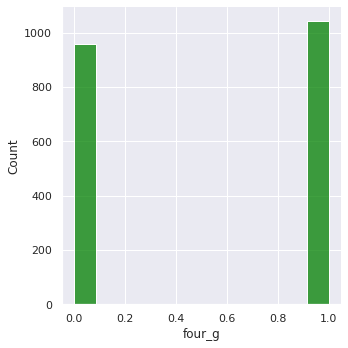

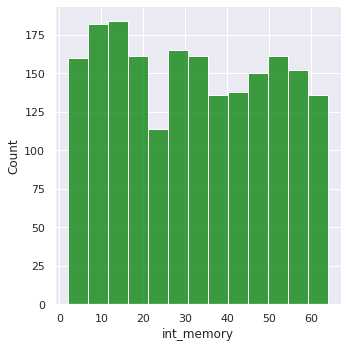

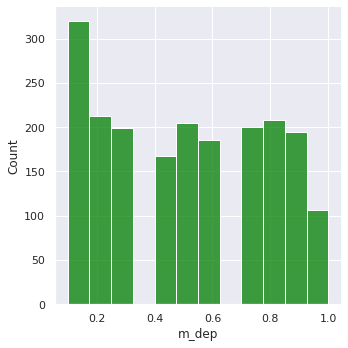

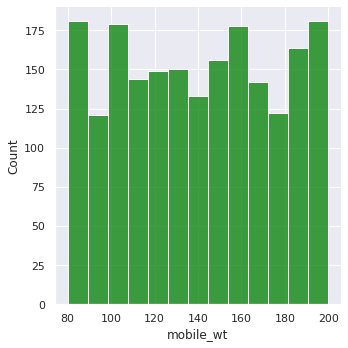

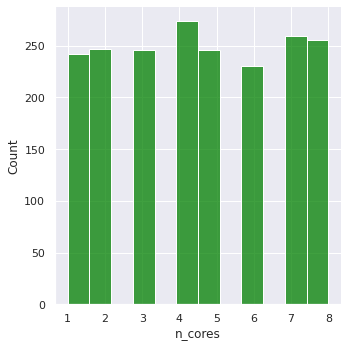

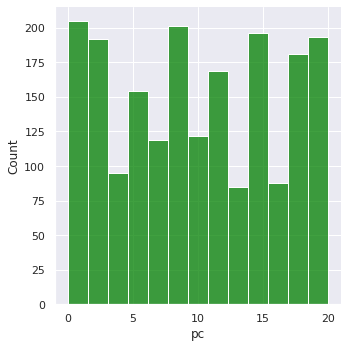

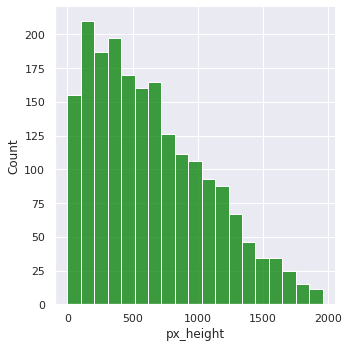

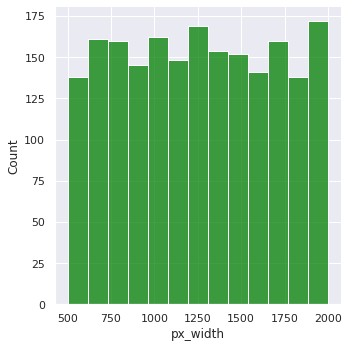

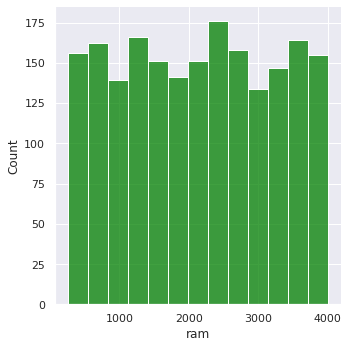

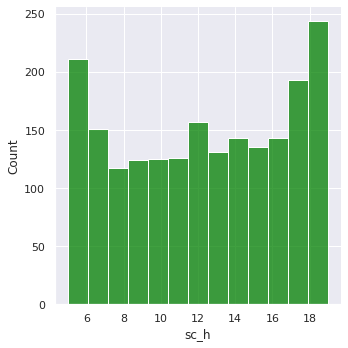

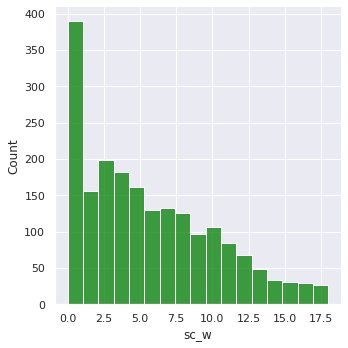

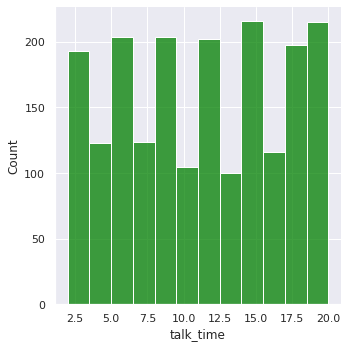

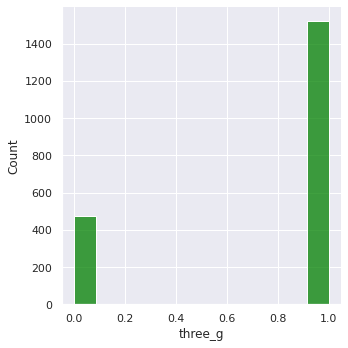

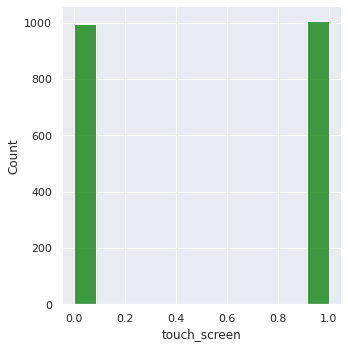

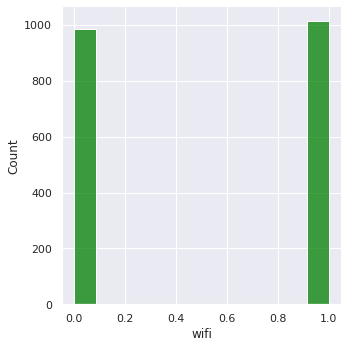

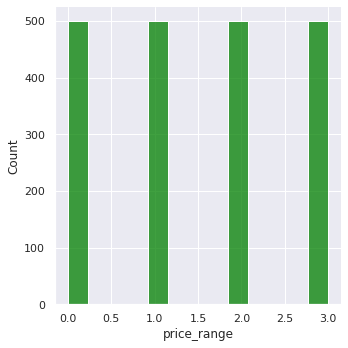

In [ ]:
col=mobile_price_df.columns
for x in col:
  sns.set(rc={'figure.figsize':(10,5)})
  ax=sns.displot(data=mobile_price_df[x],color='green')
  plt.xlabel(x)
plt.show()

# **Checking for Outliers**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


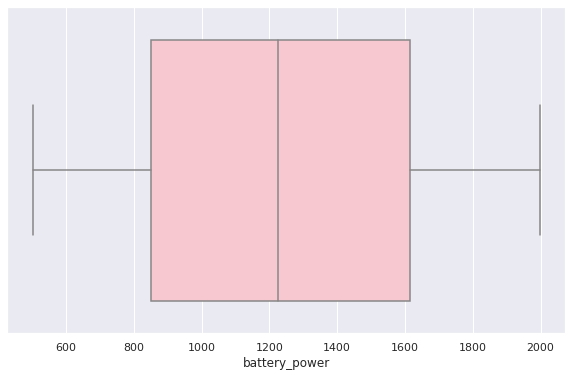

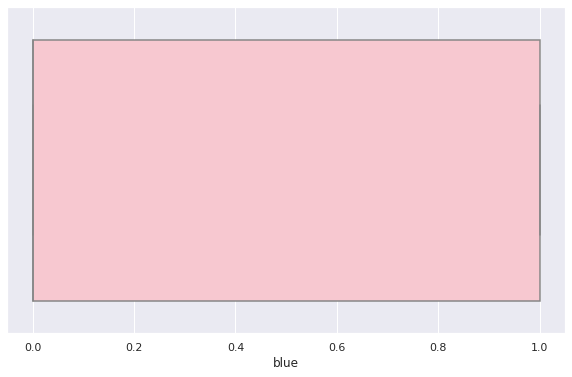

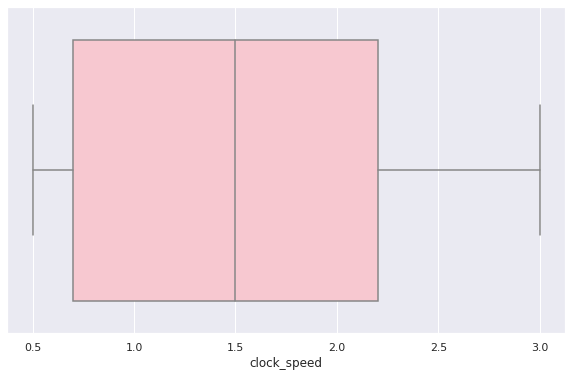

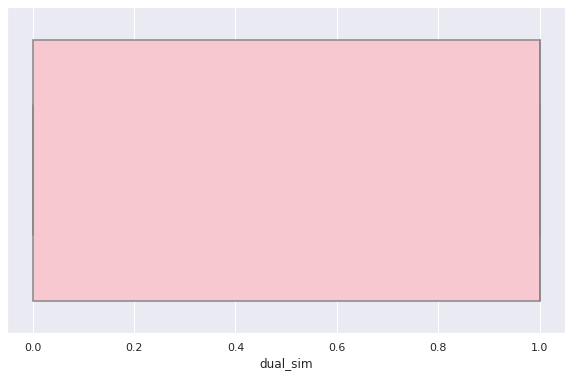

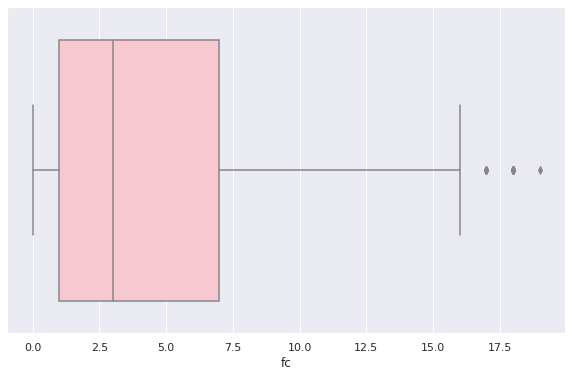

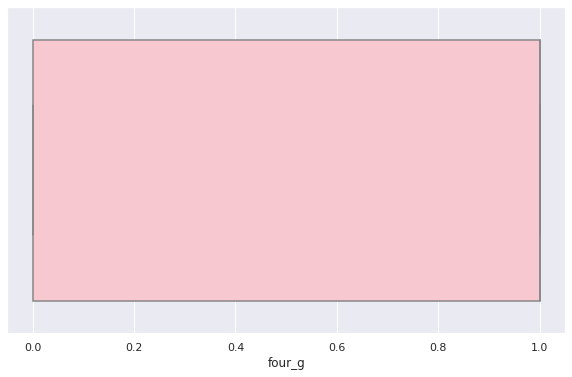

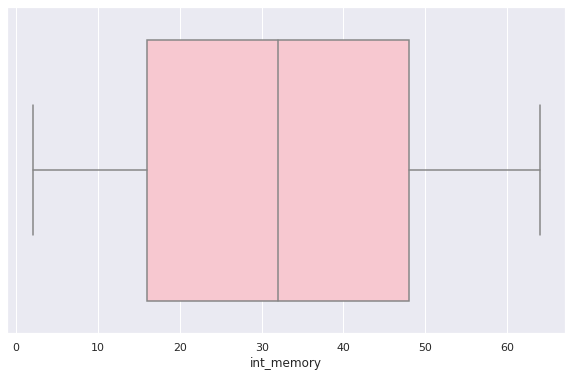

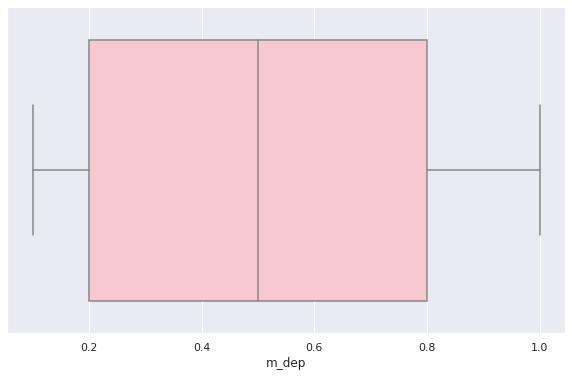

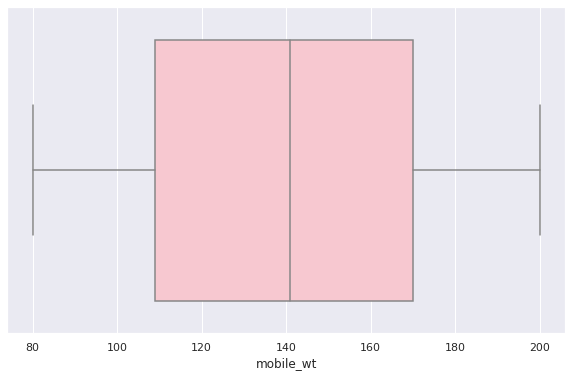

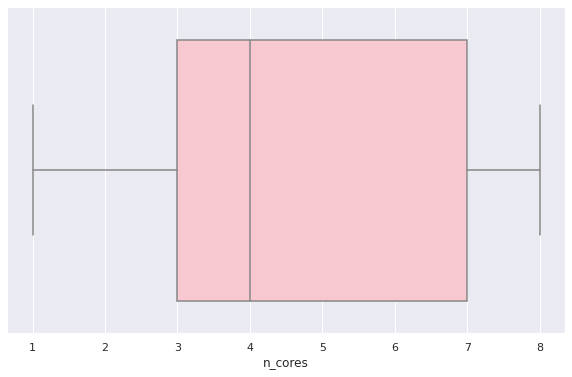

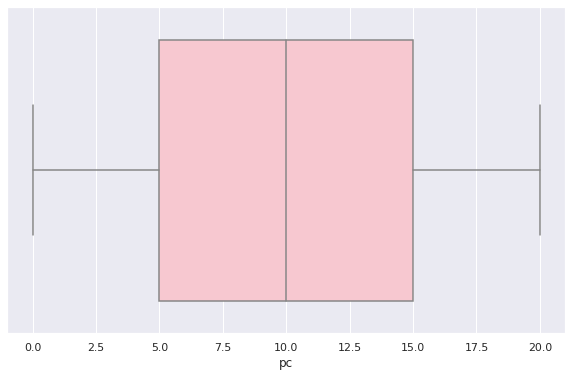

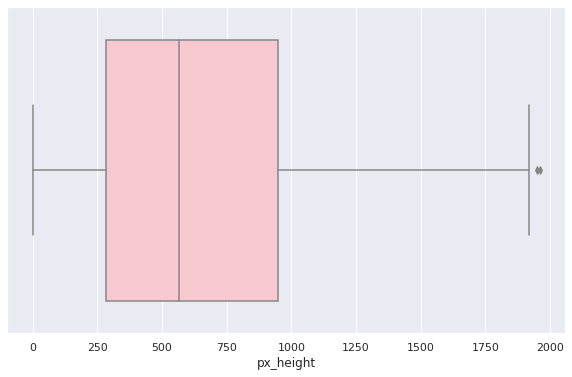

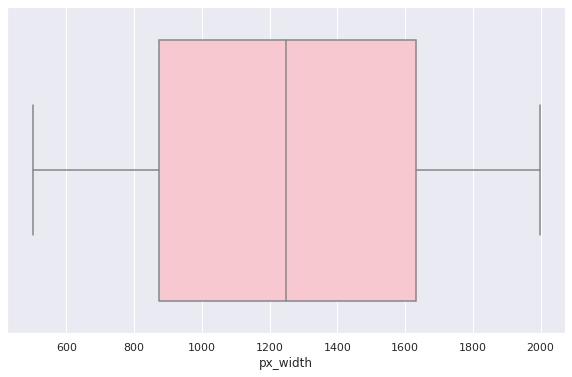

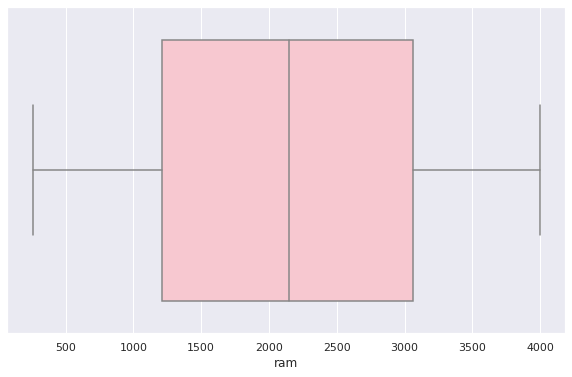

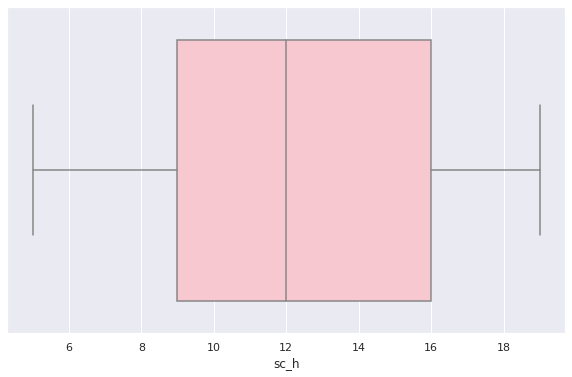

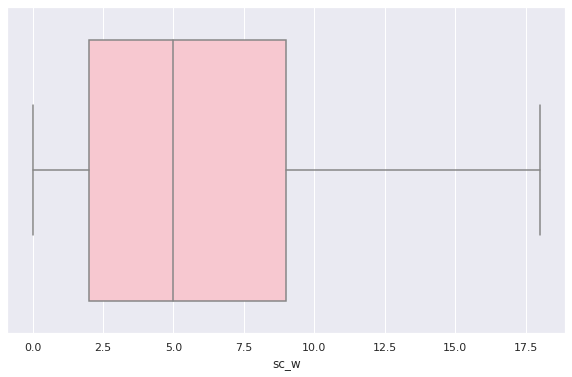

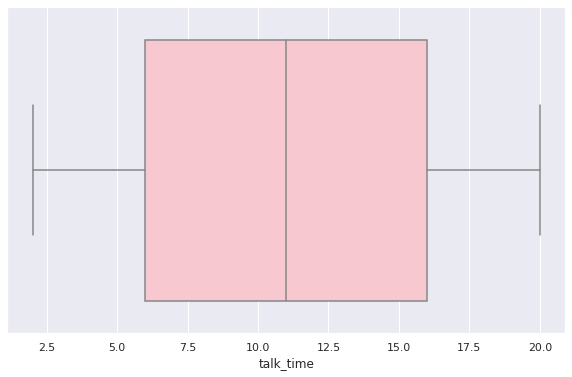

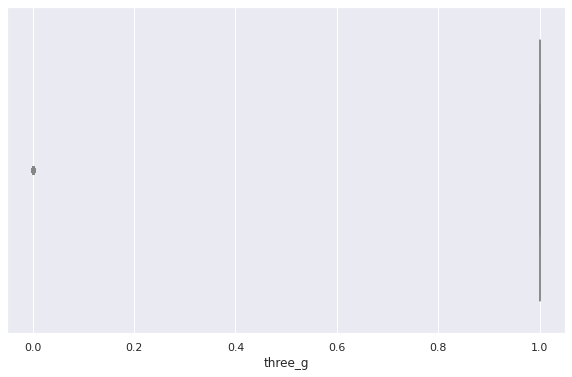

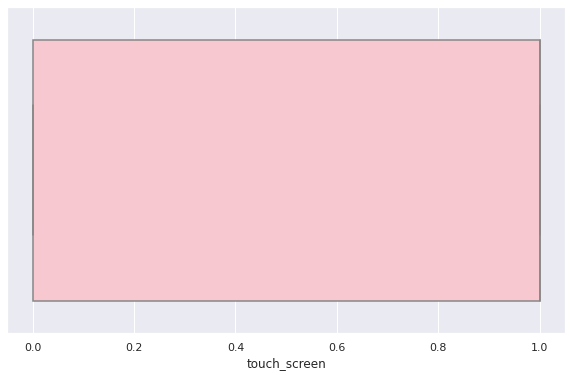

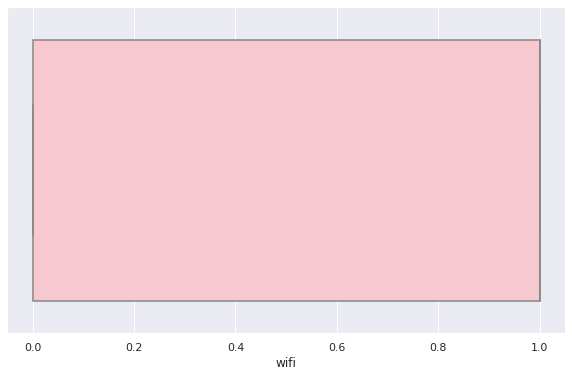

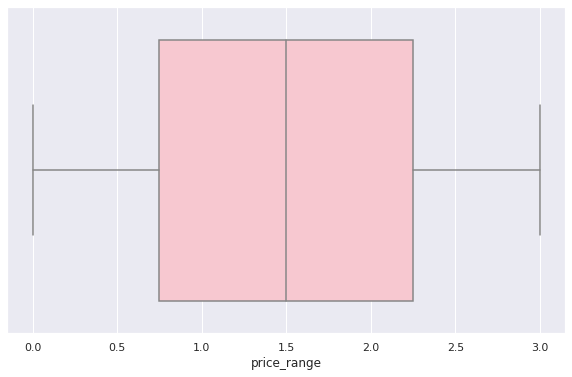

In [ ]:
#finding presence of outliers using boxplot of all numerical features
for col in mobile_price_df:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=mobile_price_df[col],color='pink')
  plt.xlabel(col)
plt.show()

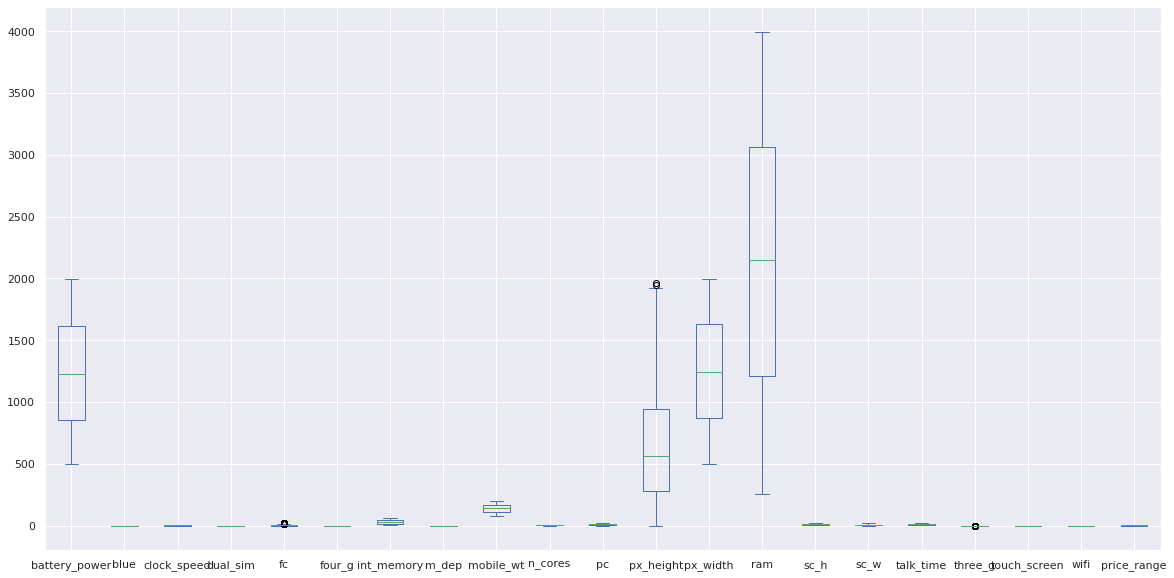

In [ ]:
mobile_price_df.plot(kind='box',figsize=(20,10))

# **Correlation**

Now check the correlation of the features for the knowledge only. Because there is no need to check correlation. All features are necessary to predict the price range of the mobile.

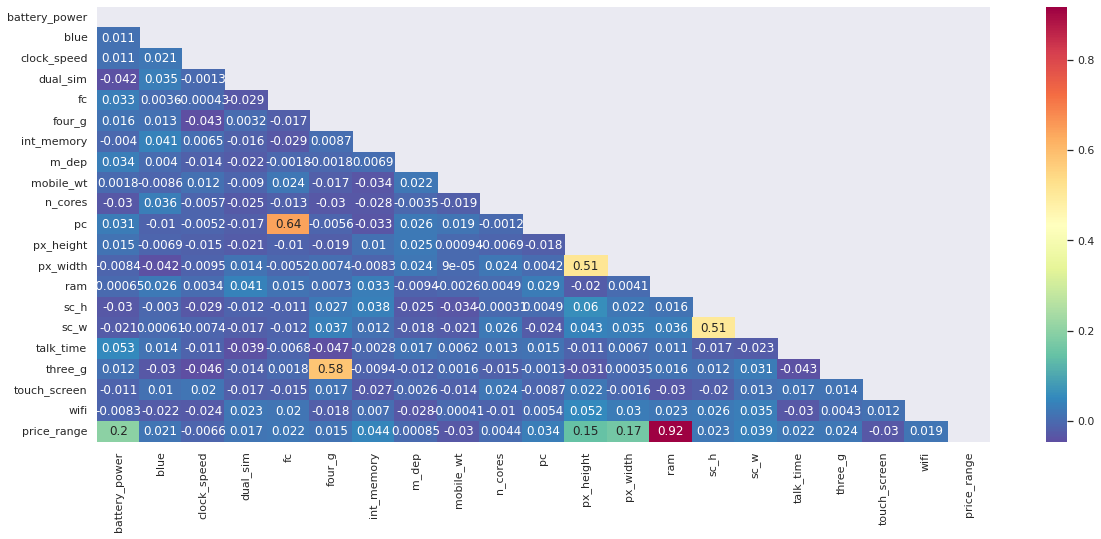

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=mobile_price_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='Spectral_r')

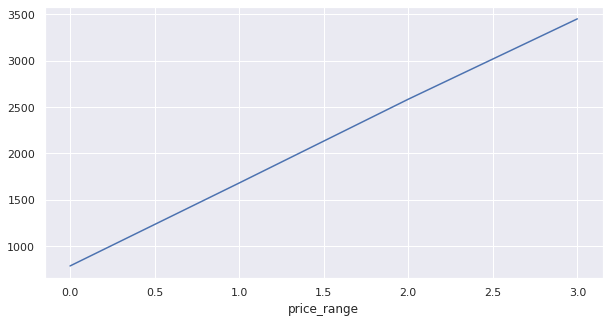

In [ ]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['ram'].plot()

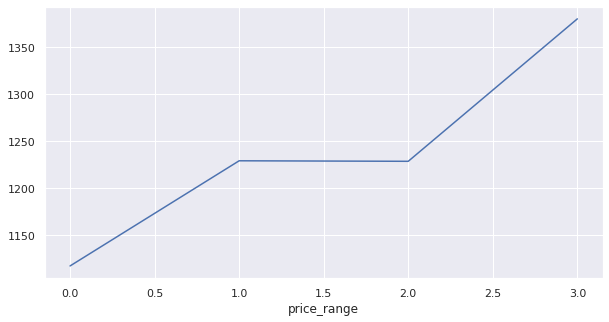

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['battery_power'].plot()

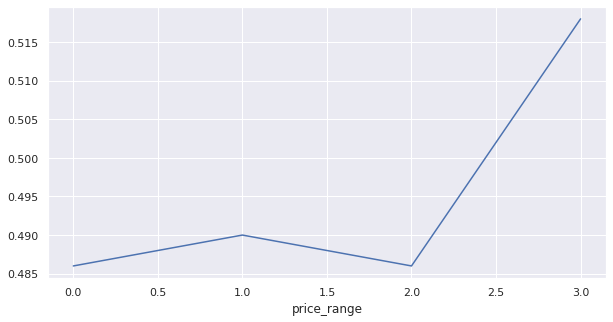

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['blue'].plot()

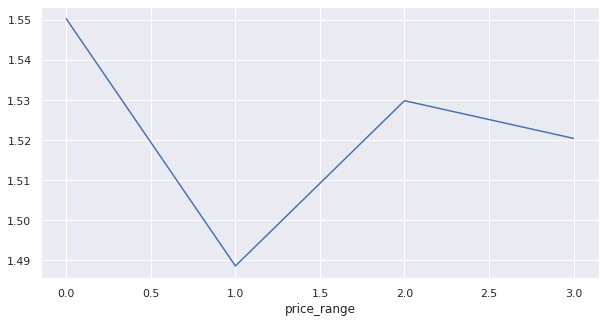

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['clock_speed'].plot()

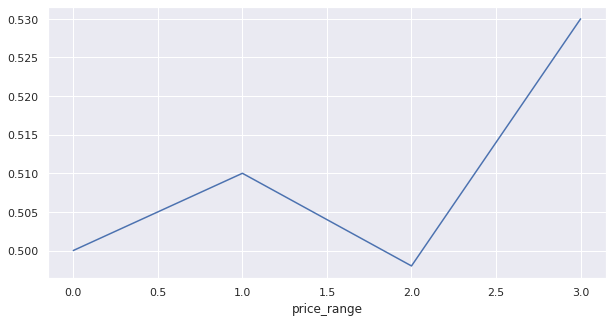

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['dual_sim'].plot()

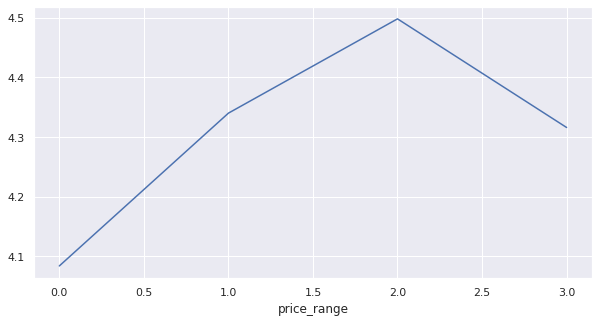

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['fc'].plot()

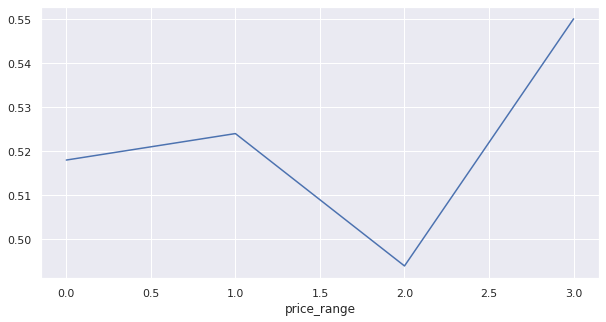

In [ ]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['four_g'].plot()

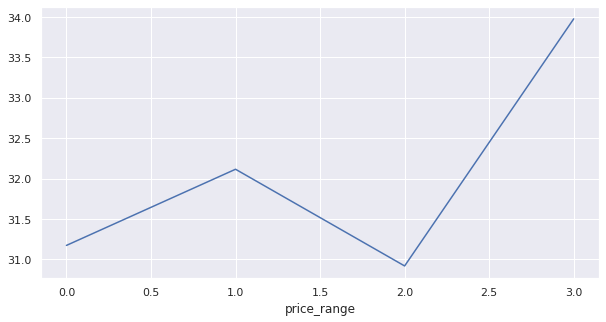

In [ ]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['int_memory'].plot()

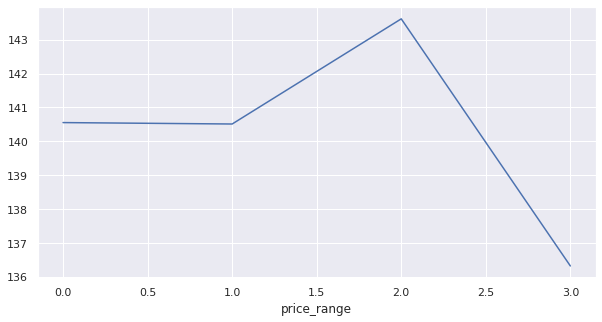

In [ ]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['mobile_wt'].plot()

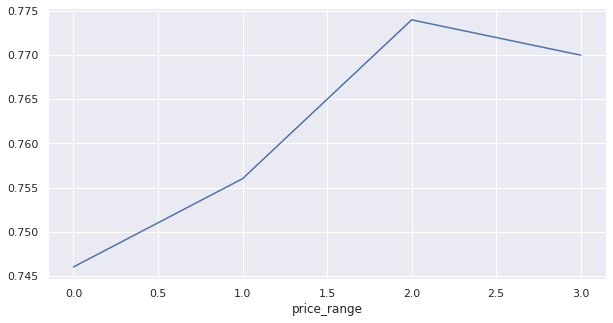

In [ ]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['three_g'].plot()

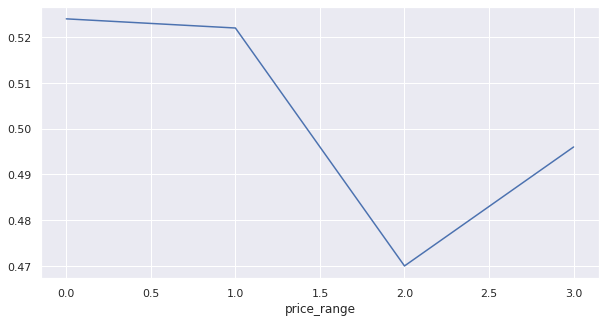

In [ ]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['touch_screen'].plot()

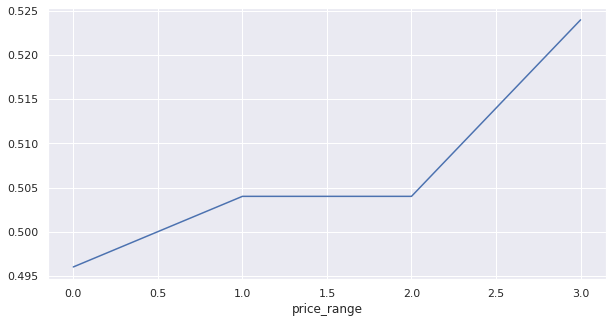

In [ ]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
mobile_price_df.groupby('price_range').mean()['wifi'].plot()

In [ ]:
mobile_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# % of Phones which support 3G

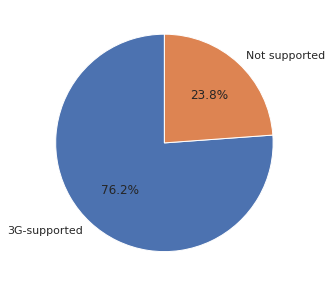

In [ ]:
labels = ["3G-supported",'Not supported']
values = mobile_price_df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

# % of Phones which support 4G

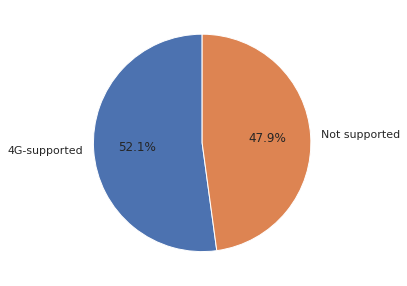

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = mobile_price_df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',startangle=90)
plt.show()

# Battery power vs Price Range

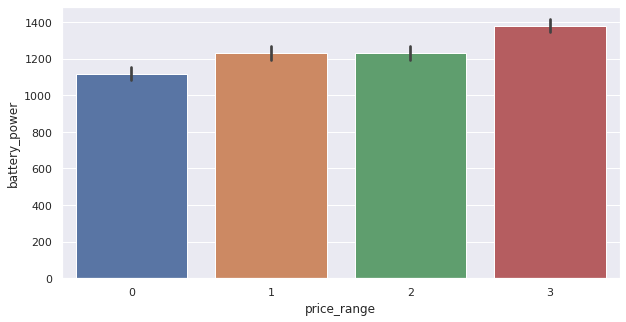

In [ ]:
sns.barplot(x="price_range", y="battery_power", data=mobile_price_df)

# No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

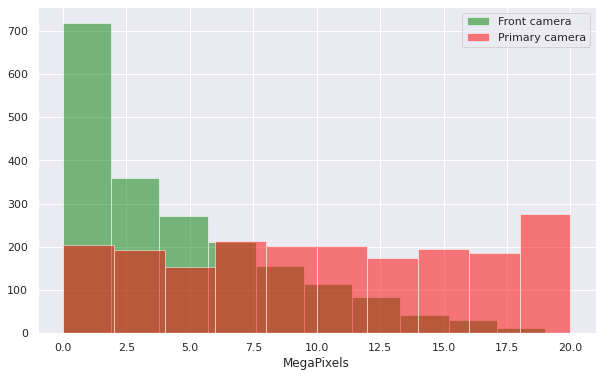

In [ ]:
plt.figure(figsize=(10,6))
mobile_price_df['fc'].hist(alpha=0.5,color='green',label='Front camera')
mobile_price_df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

# Mobile Weight vs Price range

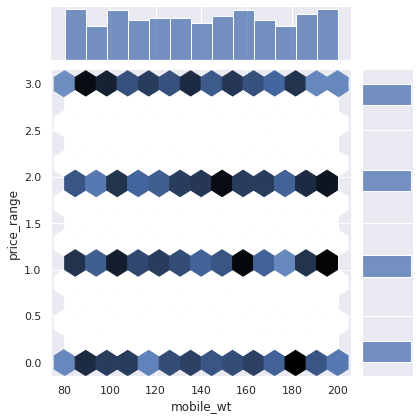

In [ ]:
sns.jointplot(x='mobile_wt',y='price_range',data=mobile_price_df,kind='hex')

# Talk time vs Price range

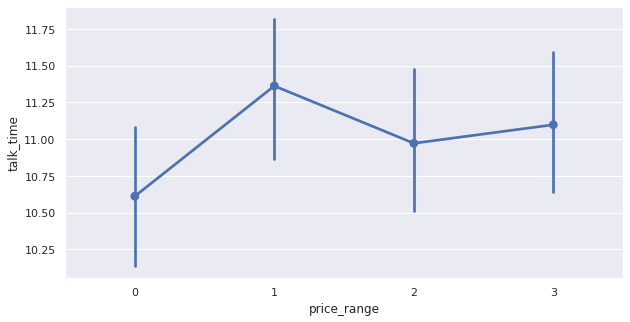

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=mobile_price_df)

# X & Y aaray

In [ ]:
#Assign the value in X and Y
#independent features
X =mobile_price_df.drop('price_range',axis=1)
#dependent(target) feature
y =mobile_price_df['price_range']

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Now, we define a function for creating a confusion matrix.**

In [57]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

**Now, as the function is defined, we can proceed with implementing the classification algorithms.**

# Random Forest Classifier

**A random forest is a supervised machine learning method built from decision tree techniques. This algorithm is used to anticipate behaviour and results in a variety of sectors, including banking and e-commerce.**
**A random forest is a machine learning approach for solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to solve complicated problems.**
**A random forest method is made up of a large number of decision trees. The random forest algorithm’s ‘forest’ is trained via bagging or bootstrap aggregation. Bagging is a meta-algorithm ensemble that increases the accuracy of machine learning algorithms.**

**Now, we do the training and prediction.**

In [ ]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

**Let us now implement the random forest algorithm.**

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)

In [ ]:
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

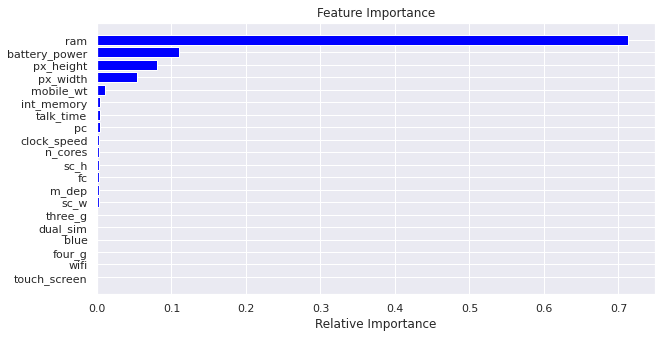

In [ ]:
#Plot the figure
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Random Forest Classifier Accuracy Score:  0.8916666666666667
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       144
           1       0.81      0.90      0.85       141
           2       0.88      0.85      0.87       178
           3       0.95      0.90      0.92       137

    accuracy                           0.89       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



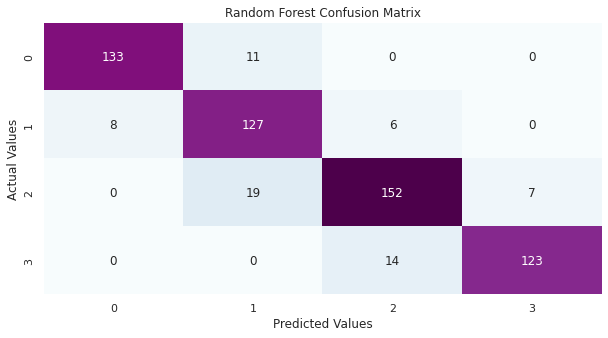

In [ ]:
#Let us apply the function for the accuracy metrics
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

**So, we can see that the random forest algorithm has good accuracy in prediction**

#Random forest GridSearchCV

In [ ]:
# Number of trees
n_estimators = [80,100,200]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [20,40,60]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4,8,12]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [80, 100, 200],
 'max_depth': [4, 6, 8],
 'min_samples_split': [20, 40, 60],
 'min_samples_leaf': [4, 8, 12]}

In [ ]:
#Importing Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [20, 40, 60],
                         'n_estimators': [80, 100, 200]},
             verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=20,
                       n_estimators=200)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 200}

In [ ]:
rf_optimal_model.fit(X_train, y_train)
y_pred_rf=rf_optimal_model.predict(X_test)

In [ ]:
features = X_train.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

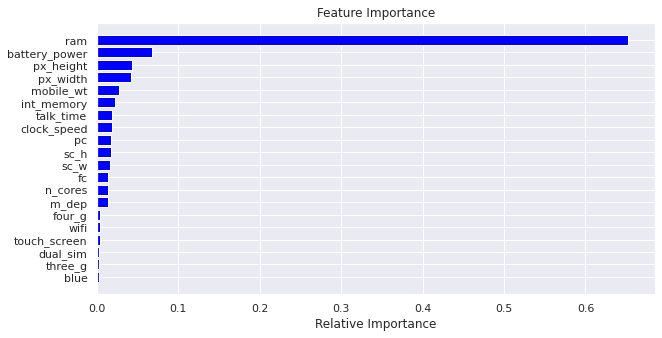

In [ ]:
#Plot the figure
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Random Forest Classifier GridSearchCV Accuracy Score:  0.8433333333333334
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       144
           1       0.73      0.84      0.78       141
           2       0.89      0.70      0.78       178
           3       0.87      0.93      0.90       137

    accuracy                           0.84       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.84      0.84       600



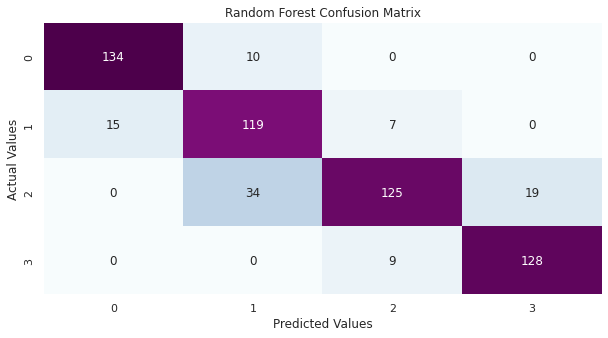

In [ ]:
#Let us apply the function for the accuracy metrics
print('Random Forest Classifier GridSearchCV Accuracy Score: ',accuracy_score(y_test,y_pred_rf))
cm_rf=my_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

# **DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.755


In [ ]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

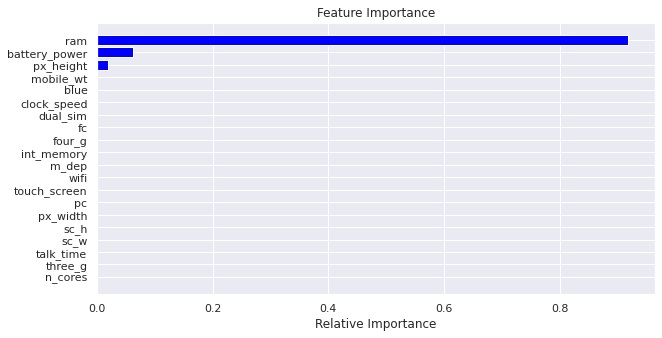

In [ ]:
#Plot the figure
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Decision Tree classifer Accuracy Score:  0.755
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       144
           1       0.62      0.83      0.71       141
           2       0.75      0.66      0.70       178
           3       0.81      0.82      0.81       137

    accuracy                           0.76       600
   macro avg       0.77      0.76      0.76       600
weighted avg       0.77      0.76      0.76       600



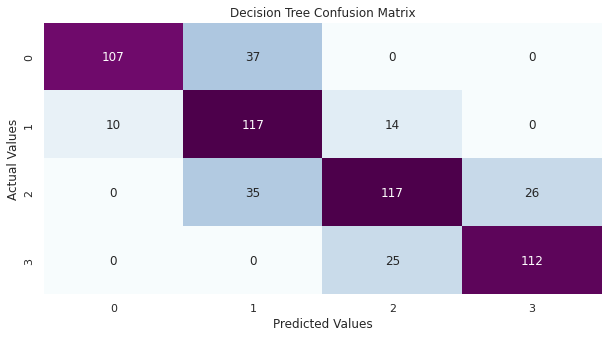

In [ ]:
#Let us apply the function for the accuracy metrics
print('Decision Tree classifer Accuracy Score: ',accuracy_score(y_test,y_pred))
cm_dt=my_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix')

In [ ]:
!pip install sklearn.cross_validation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


# **Feature Importance Selection**

In [ ]:
feat_imp = ExtraTreesClassifier()
feat_imp.fit(X_train,y_train)

ExtraTreesClassifier()

In [42]:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

ExtraTreesClassifier()

In [43]:
print(feat_imp.feature_importances_)

[0.0587009  0.02147901 0.03625977 0.02075328 0.03300208 0.01897017
 0.03760699 0.03433749 0.038853   0.03465594 0.03415545 0.0469124
 0.04642101 0.37730142 0.03432809 0.03500314 0.03589033 0.01556292
 0.01910835 0.02069825]


In [50]:
features = X_train.columns
importances = feat_imp.feature_importances_
indices = np.argsort(importances)

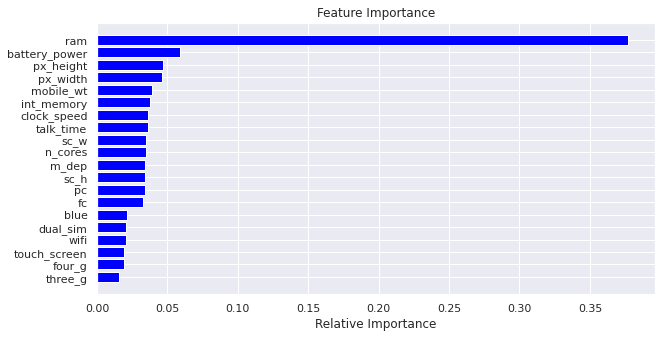

In [51]:
#Plot the figure
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **KNN Classifier**

The K Nearest Neighbor method is a type of supervised learning technique that is used for classification and regression. It’s a flexible approach that may also be used to fill in missing values and resample datasets. K Nearest Neighbor examines K Nearest Neighbors (Data points) to forecast the class or continuous value for a new Datapoint, as the name indicates.

In [53]:
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [54]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

KNN Classifier Accuracy Score:  0.925
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.87      0.93      0.90       141
           2       0.92      0.88      0.90       178
           3       0.96      0.93      0.94       137

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



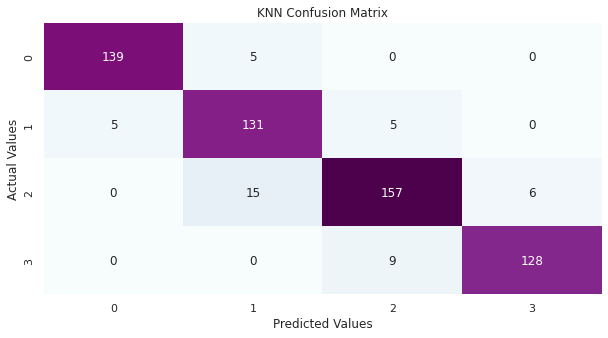

In [58]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

# **SVM Classifier**

Support Vector Machine, or SVM, is a prominent Supervised Learning technique that is used for both classification and regression issues. However, it is mostly utilised in Machine Learning for Classification purposes.

The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.

In [61]:
svm_clf = svm.SVC(decision_function_shape='ovo')

In [62]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_test)

SVM Classifier Accuracy Score:  0.945
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.89      0.96      0.92       141
           2       0.95      0.90      0.92       178
           3       0.97      0.95      0.96       137

    accuracy                           0.94       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.94      0.94       600



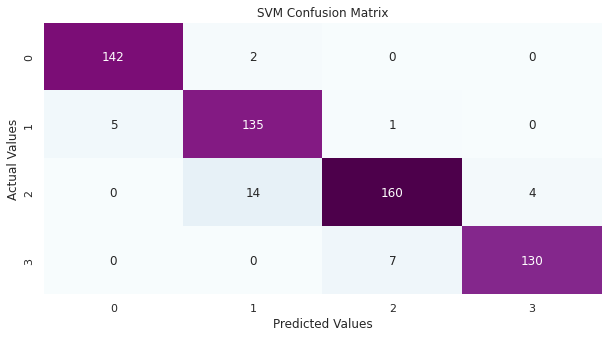

In [63]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')